### 1. Supervised, Semi-Supervised, and Unsupervised Learning
##### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Homework 6 Data/wdbc.data",header=None)

In [4]:
data[1][data[1] == 'M'] = 1
data[1][data[1] == 'B'] = 0

In [5]:
data[data[1] == 0]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409
48,857155,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301
49,857156,0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917
50,857343,0,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563
51,857373,0,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,...,14.670,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025
52,857374,0,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,...,13.100,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408


##### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

In [6]:
def random30(i):
    train_X_M, test_X_M, train_y_M, test_y_M = train_test_split(data[data[1] == 1].iloc[:,2:], data[data[1] == 1].iloc[:,1], train_size = 0.8, random_state = i)
    train_X_B, test_X_B, train_y_B, test_y_B = train_test_split(data[data[1] == 0].iloc[:,2:], data[data[1] == 0].iloc[:,1], train_size = 0.8, random_state = i)
    train_X = pd.concat([train_X_M, train_X_B])
    test_X = pd.concat([test_X_M, test_X_B])
    train_y = pd.concat([train_y_M, train_y_B])
    test_y = pd.concat([test_y_M, test_y_B])
    return train_X, train_y, test_X, test_y

In [7]:
train_X_M, test_X_M, train_y_M, test_y_M = train_test_split(data[data[1] == 1].iloc[:,2:], data[data[1] == 1].iloc[:,1], train_size = 0.8, random_state = 42)
train_X_B, test_X_B, train_y_B, test_y_B = train_test_split(data[data[1] == 0].iloc[:,2:], data[data[1] == 0].iloc[:,1], train_size = 0.8, random_state = 42)
train_X = pd.concat([train_X_M, train_X_B])
test_X = pd.concat([test_X_M, test_X_B])
train_y = pd.concat([train_y_M, train_y_B])
test_y = pd.concat([test_y_M, test_y_B])

In [8]:
train_X

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
254,19.450,19.33,126.50,1169.0,0.10350,0.11880,0.137900,0.085910,0.1776,0.05647,...,25.700,24.57,163.10,1972.0,0.14970,0.31610,0.43170,0.19990,0.3379,0.08950
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.800,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.190,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.096670,0.1741,0.05176,...,22.030,17.81,146.60,1495.0,0.11240,0.20160,0.22640,0.17770,0.2443,0.06251
190,14.220,23.12,94.37,609.9,0.10750,0.24130,0.198100,0.066180,0.2384,0.07542,...,15.740,37.18,106.40,762.4,0.15330,0.93270,0.84880,0.17720,0.5166,0.14460
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.760,24.70,129.10,1228.0,0.08822,0.19630,0.25350,0.09181,0.2369,0.06558
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,0.2310,0.06343,...,24.090,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
27,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.077310,0.1697,0.05699,...,21.310,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,...,25.680,32.07,168.20,2022.0,0.13680,0.31010,0.43990,0.22800,0.2268,0.07425
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,0.2131,0.06325,...,19.590,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061


#### i. Supervised Learning: Train an L1-penalized SVM to classify the data.
#### Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.1

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
def score(train_X, train_y, test_X, test_y):
    param_grid_L1 = {'C':[1]}
    train_X = normalize(train_X)
    train_y = train_y.astype('int')
    test_X = normalize(test_X)
    test_y = test_y.astype('int')
    C_value = [0.01,0.1,1,10,100,1000]
    best_c = 0
    highest_score = float("-inf")
    for i in C_value:
        clf = LinearSVC(penalty = 'l1', C = i, dual = False)
        scores = cross_val_score(clf , train_X , train_y , cv=5).mean()
        if scores > highest_score:
            highest_score = scores
            best_c = i
    clf = LinearSVC(penalty = 'l1', C = best_c, dual = False)
    y_pre = clf.fit(train_X, train_y).predict(test_X)
    fpr,tpr,threshold = roc_curve(test_y, clf.decision_function(test_X))
    roc_auc = auc(fpr,tpr) #AUC
    accuracy = accuracy_score(test_y, y_pre)
    precision = precision_score(test_y, y_pre, average='weighted')
    recall = recall_score(test_y, y_pre, average='weighted')
    f1 = f1_score(test_y, y_pre, average='weighted')
    return roc_auc, accuracy, precision, recall, f1, y_pre, fpr, tpr, threshold

In [11]:
normalize(test_X)

array([[8.90100828e-03, 1.22267612e-02, 5.90783061e-02, ...,
        8.24509589e-05, 1.69613401e-04, 5.18725080e-05],
       [1.08396058e-02, 1.27218601e-02, 7.52901712e-02, ...,
        1.18866476e-04, 1.96395985e-04, 7.25061295e-05],
       [1.07606792e-02, 1.46916580e-02, 6.91372140e-02, ...,
        6.81769749e-05, 1.50277417e-04, 4.76998765e-05],
       ...,
       [1.63208861e-02, 2.73633650e-02, 1.04826866e-01, ...,
        6.10020275e-05, 2.78490295e-04, 8.78158247e-05],
       [1.96305363e-02, 3.75471827e-02, 1.24866212e-01, ...,
        1.33212287e-04, 6.44536279e-04, 1.73094746e-04],
       [1.64468249e-02, 2.34288487e-02, 1.07238340e-01, ...,
        1.58544872e-04, 3.92329241e-04, 1.04818577e-04]])

In [12]:
score(train_X, train_y, test_X, test_y)

(0.9932170542635659,
 0.9304347826086956,
 0.9338520977308591,
 0.9304347826086956,
 0.9309868875086268,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]),
 array([0.        , 0.        , 0.06944444, 0.06944444, 0.11111111,
        0.11111111, 1.        ]),
 array([0.02325581, 0.93023256, 0.93023256, 0.95348837, 0.95348837,
        1.        , 1.        ]),
 array([ 5.888129  ,  1.11845592,  0.3207736 ,  0.25808854, -0.09067748,
        -0.52900258, -9.07749853]))

In [13]:
stack = [[],[],[],[],[]]
for i in range(30):
    a,b,c,d = random30(i)
    roc_auc, accuracy, precision, recall, f1, y_pre, fpr, tpr, threshold = score(a,b,c,d)
    stack[0].append(roc_auc)
    stack[1].append(accuracy)
    stack[2].append(precision)
    stack[3].append(recall)
    stack[4].append(f1)
print('roc_auc :',sum(stack[0])/30)
print('accuracy :',sum(stack[1])/30)
print('precision :',sum(stack[2])/30)
print('recall :',sum(stack[3])/30)
print('f1_score :',sum(stack[4])/30)

roc_auc : 0.9932170542635661
accuracy : 0.9576811594202899
precision : 0.9583765119388384
recall : 0.9576811594202899
f1_score : 0.9576872869228429


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

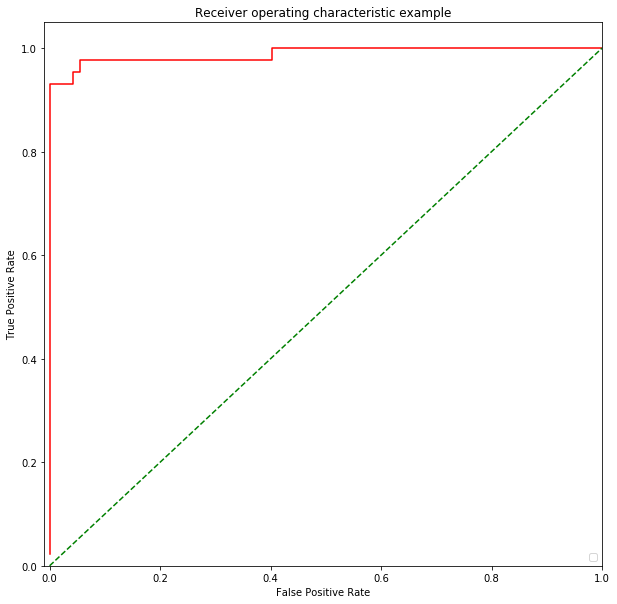

confusion matrix:  [[69  3]
 [ 3 40]]


In [14]:
plt.figure()
# lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
conf_matrix = confusion_matrix(test_y.astype('int'), y_pre) 
print('confusion matrix: ', conf_matrix)

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [15]:
def label(i):
    train_X_M, test_X_M, train_y_M, test_y_M = train_test_split(data[data[1] == 1].iloc[:,2:], data[data[1] == 1].iloc[:,1], train_size = 0.8, random_state = i)
    train_X_B, test_X_B, train_y_B, test_y_B = train_test_split(data[data[1] == 0].iloc[:,2:], data[data[1] == 0].iloc[:,1], train_size = 0.8, random_state = i)
    
    train_y_M_label = train_y_M.iloc[:len(train_y_M)//2,]
    train_X_M_label = train_X_M.iloc[:len(train_X_M)//2,]
    train_y_M_unlabel = train_y_M.iloc[len(train_y_M)//2:,]
    train_X_M_unlabel = train_X_M.iloc[len(train_X_M)//2:,]
    train_y_B_label = train_y_B.iloc[:len(train_y_B)//2,]
    train_X_B_label = train_X_B.iloc[:len(train_X_B)//2,]
    train_y_B_unlabel = train_y_B.iloc[len(train_y_B)//2:,]
    train_X_B_unlabel = train_X_B.iloc[len(train_X_B)//2:,]
    
    train_X_label = pd.concat([train_X_M_label, train_X_B_label])
    train_y_label = pd.concat([train_y_M_label, train_y_B_label])
    train_X_unlabel = pd.concat([train_X_M_unlabel, train_X_B_unlabel])
    train_y_unlabel = pd.concat([train_y_M_unlabel, train_y_B_unlabel])
    
    test_X = pd.concat([test_X_M, test_X_B])
    test_y = pd.concat([test_y_M, test_y_B])
    
    train_X_label = normalize(train_X_label.to_numpy())
    train_X_unlabel = normalize(train_X_unlabel.to_numpy())
    train_y_label = train_y_label.astype('int')
    train_y_unlabel = train_y_unlabel.astype('int')
    test_X = normalize(test_X)
    test_y = test_y.astype('int')
    
    return train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X, test_y

In [16]:
def semi_learning(train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X, test_y):
    C_value = [0.01,0.1,1,10,100,1000]
    best_c = 0
    highest_score = float("-inf")
    for i in C_value:
        clf = LinearSVC(penalty = 'l1', C = i, dual = False)
        scores = cross_val_score(clf , train_X_label , train_y_label , cv=5).mean()
        if scores > highest_score:
            highest_score = scores
            best_c = i
    farthest = 0
    stack = []
    for x in range(len(train_X_unlabel)):
        model = LinearSVC(penalty = 'l1', C = best_c, dual = False).fit(train_X_label, train_y_label) #.predict(test_X)
        decision_func = model.decision_function(train_X_unlabel[x].reshape(1, -1))
        norm = np.linalg.norm(model.coef_)
        dist = np.power(decision_func / norm, 2)
        stack.append(dist)
#         if dist > farthest:
#             farthest = dist
            
    return stack, best_c

In [17]:
def sort_data(train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X_2, test_y_2):
    dist, best_c = semi_learning(train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X_2, test_y_2)
    sort_df_x = pd.concat([pd.DataFrame(train_X_unlabel),pd.DataFrame(dist, columns = {'Dist'})], axis = 1)
    sort_df_y = pd.concat([pd.DataFrame(pd.DataFrame(train_y_unlabel).reset_index().iloc[:,1]),pd.DataFrame(dist, columns = {'Dist'})], axis = 1)
    sort_df_x = sort_df_x.sort_values(by='Dist', ascending=False)
    sort_df_y = sort_df_y.sort_values(by='Dist', ascending=False)
    return sort_df_x.iloc[:,:-1], sort_df_y.iloc[:,:-1], best_c

In [18]:
def score_2(train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X, test_y):
    sort_df_x, sort_df_y, best_c = sort_data(train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X, test_y)
    
    highest_score = float("-inf")
    
    for i in range(len(sort_df_x)):
        train_X_label = np.concatenate((train_X_label, sort_df_x.iloc[i,:].to_numpy().reshape(1,-1)), axis = 0)
        train_y_label = np.concatenate((train_y_label, sort_df_y.iloc[i,:].to_numpy()), axis = 0)
        clf = LinearSVC(penalty = 'l1', C = best_c, dual = False)
        scores = cross_val_score(clf , train_X_label , train_y_label , cv=5).mean()
        if scores > highest_score:
            highest_score = scores         
            y_pre = clf.fit(train_X_label, train_y_label).predict(test_X)
            fpr,tpr,threshold = roc_curve(test_y, clf.decision_function(test_X))
            roc_auc = auc(fpr,tpr) #AUC
            accuracy = accuracy_score(test_y, y_pre)
            precision = precision_score(test_y, y_pre, average='weighted')
            recall = recall_score(test_y, y_pre, average='weighted')
            f1 = f1_score(test_y, y_pre, average='weighted')
    
    return [roc_auc, accuracy, precision, recall, f1, y_pre, fpr, tpr, threshold]

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [19]:
# np.concatenate((train_y_label, sort_df_y.iloc[i,:].to_numpy()), axis = 0)

In [20]:
stack = []
for i in range(30):
    train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X, test_y = label(i)
    stack1 = score_2(train_X_label, train_y_label, train_X_unlabel, train_y_unlabel, test_X, test_y)
    stack.append(stack1)
    
roc_auc_total = 0
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0

for i in range(len(stack)):
    roc_auc_total = roc_auc_total + stack[i][0]
    accuracy_total = accuracy_total + stack[i][1]
    precision_total = precision_total + stack[i][2]
    recall_total = recall_total + stack[i][3]
    f1_total = f1_total + stack[i][4]


print('roc_auc :',roc_auc_total/30)
print('accuracy :',accuracy_total/30)
print('precision :',precision_total/30)
print('recall :',recall_total/30)
print('f1_score :',f1_total/30)

roc_auc : 0.9899117140396212
accuracy : 0.9513043478260866
precision : 0.9522240889803372
recall : 0.9513043478260866
f1_score : 0.9512087554005613


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

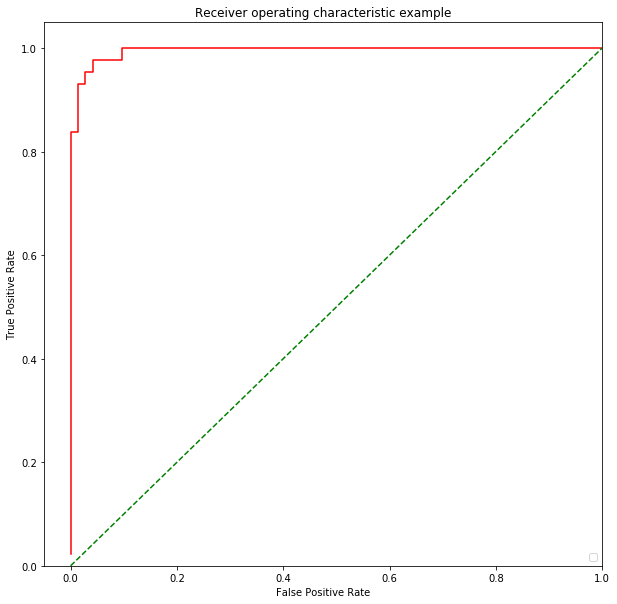

confusion matrix:  [[69  3]
 [ 1 42]]


In [21]:
plt.figure()
# lw = 2
plt.figure(figsize=(10,10))
plt.plot(stack[0][6], stack[0][7], color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
conf_matrix = confusion_matrix(test_y.astype('int'), stack[0][5]) 
print('confusion matrix: ', conf_matrix)

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
result = []
for i in range(30):
    X_train_k_means, y_train_k_means, X_test_k_means, y_test_k_means = random30(i)
    model = KMeans(n_clusters = 2).fit(X_train_k_means)
    predict_k_means = model.predict(X_train_k_means)
    result.append(silhouette_score(X_train_k_means, predict_k_means))

In [24]:
result

[0.694546353519768,
 0.6923424250149689,
 0.7007546974071368,
 0.7050499316770437,
 0.6936993847914004,
 0.7007758826832331,
 0.6963950758052887,
 0.6976694618318638,
 0.7055569321330655,
 0.7033620217571006,
 0.6965221046660106,
 0.6951859900054884,
 0.6913412140739946,
 0.6975195795399949,
 0.6979918040294163,
 0.6926134463728034,
 0.7092047194082652,
 0.6962252893723703,
 0.7017073984791374,
 0.6965488754409435,
 0.702268012384869,
 0.6938036856618328,
 0.6990989800138985,
 0.7015190650455575,
 0.70278447975639,
 0.7055691072253327,
 0.6991878347878235,
 0.6939402989321986,
 0.7011881639821719,
 0.6936351975628733]

By the result we can find the K-means algorithm finds a local rather than a global optimum,
the results obtained will depend on the initial (random) cluster assignment
of each observation

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.2

In [25]:
X_train_k_means, y_train_k_means, X_test_k_means, y_test_k_means = random30(i)
model = KMeans(n_clusters = 2).fit(X_train_k_means)
predict_k_means = model.predict(X_train_k_means)

In [26]:
def run_k_30(i):
    X_train_k_means, y_train_k_means, X_test_k_means, y_test_k_means = random30(i)
    model = KMeans(n_clusters = 2).fit(X_train_k_means)
    predict_k_means = model.predict(X_train_k_means)
    center = model.cluster_centers_
#     model.labels_
    i_0 = []
    i_1 = []
    stack_0 = []
    stack_1 = []
    for i in range(len(X_train_k_means.to_numpy())):
        if y_train_k_means.to_numpy()[i] == 0:
            a = X_train_k_means.to_numpy()[i]
            dist = np.linalg.norm(a - center[0])
            stack_0.append(dist)
            i_0.append(i)
        elif y_train_k_means.to_numpy()[i] == 1:
            a = X_train_k_means.to_numpy()[i]
            dist = np.linalg.norm(a - center[1])
            stack_0.append(dist)
            i_1.append(i)
        
    stack_copy = stack_0.copy()
    stack_copy.sort()
    stack_copy_set = set(stack_copy[:30]) 
    top_30_near = []
    y_pre = []
    test_y = []
    for i in range(len(stack_copy)):
        if stack_copy[i] in stack_copy_set:
            y_pre.append(predict_k_means[i])
            test_y.append(y_train_k_means.to_numpy()[i])            
    count1 = 0
    count0 = 0
    for i in range(len(y_pre)):
        if y_pre[i] == 1:
            count1 = count1 + 1
        else:
            count0 = count0 + 1
        if count0 > 15:
            y_pre = [0] * 30
            break
        if count1 > 15:
            y_pre = [1] * 30
            break
    
    y_pre = model.predict(X_test_k_means)        
    y_pre = np.array(y_pre)
    test_y = y_test_k_means.astype('int') 
#     roc_auc_total = 0
#     accuracy_total = 0
#     precision_total = 0
#     recall_total = 0
#     f1_total = 0
#     for i in range(len(y_pre)):
#         diff = predict_k_means[i] - y_train_k_means.to_numpy()[i]
    fpr,tpr,threshold = roc_curve(test_y, y_pre)
    roc_auc = auc(fpr,tpr) #AUC
    accuracy = accuracy_score(test_y, y_pre)
    precision = precision_score(test_y, y_pre, average='weighted')
    recall = recall_score(test_y, y_pre, average='weighted')
    f1 = f1_score(test_y, y_pre, average='weighted')

#     roc_auc_total = roc_auc_total + roc_auc
#     accuracy_total = accuracy_total + accuracy
#     precision_total = precision_total + precision
#     recall_total = recall_total + recall
#     f1_total = f1_total + f1
        
    return [roc_auc, accuracy, precision, recall, f1, y_pre, fpr, tpr, threshold]

In [27]:
y_test_k_means.to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=object)

In [28]:
diff_stack = []
for i in range(30):
    k = run_k_30(i)
    diff_stack.append(k)

No handles with labels found to put in legend.


roc_auc : 0.5876776485788116
accuracy : 0.5988405797101449
precision : 0.5867020431921308
recall : 0.5988405797101449
f1_score : 0.5732232167720688


<Figure size 432x288 with 0 Axes>

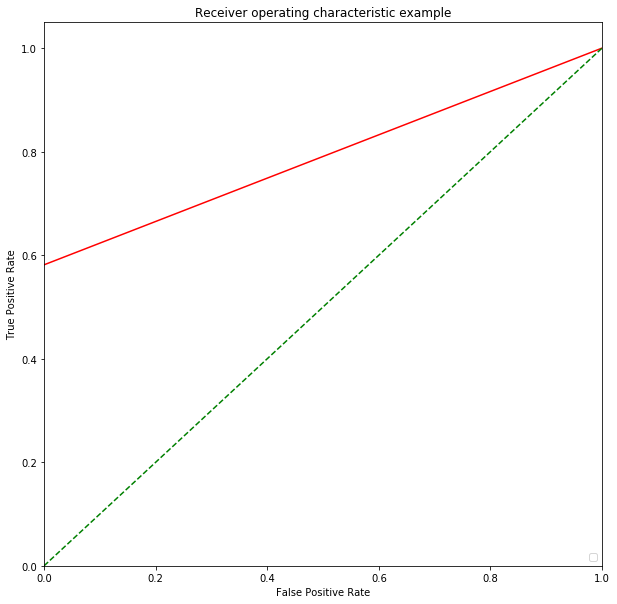

confusion matrix:  [[72  0]
 [18 25]]


In [29]:
roc_auc_total = 0
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0

for i in range(len(diff_stack)):
    roc_auc_total = roc_auc_total + diff_stack[i][0]
    accuracy_total = accuracy_total + diff_stack[i][1]
    precision_total = precision_total + diff_stack[i][2]
    recall_total = recall_total + diff_stack[i][3]
    f1_total = f1_total + diff_stack[i][4]
    
y_pre, fpr, tpr, threshold = diff_stack[13][5],diff_stack[13][6],diff_stack[13][7],diff_stack[13][8]
    
print('roc_auc :',roc_auc_total/30)
print('accuracy :',accuracy_total/30)
print('precision :',precision_total/30)
print('recall :',recall_total/30)
print('f1_score :',f1_total/30)
plt.figure()
# lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
conf_matrix = confusion_matrix(test_y.astype('int'), y_pre) 
print('confusion matrix: ', conf_matrix)

#### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [30]:
def run_k_30_c(i):
    X_train_k_means, y_train_k_means, X_test_k_means, y_test_k_means = random30(i)
    model = KMeans(n_clusters = 2).fit(X_train_k_means)
    predict_k_means = model.predict(X_train_k_means)
    center = model.cluster_centers_
    y_pre = []
    for i in range(len(X_test_k_means.to_numpy())):
        a = X_test_k_means.to_numpy()[i]
        dist1 = np.linalg.norm(a - center[1])
        dist2 = np.linalg.norm(a - center[0])
        if dist1 > dist2:
            y_pre.append(0)
        else:
            y_pre.append(1)
    y_test_k_means = y_test_k_means.astype('int')    
    fpr,tpr,threshold = roc_curve(y_test_k_means, y_pre)
    roc_auc = auc(fpr,tpr) #AUC
    accuracy = accuracy_score(y_test_k_means, y_pre)
    precision = precision_score(y_test_k_means, y_pre, average='weighted')
    recall = recall_score(y_test_k_means, y_pre, average='weighted')
    f1 = f1_score(y_test_k_means, y_pre, average='weighted')

    return [roc_auc, accuracy, precision, recall, f1, y_pre, fpr, tpr, threshold]

In [31]:
diff_stack = []
for i in range(30):
    k = run_k_30_c(i)
    diff_stack.append(k)

In [32]:
roc_auc_total = 0
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0

for i in range(len(diff_stack)):
    roc_auc_total = roc_auc_total + diff_stack[i][0]
    accuracy_total = accuracy_total + diff_stack[i][1]
    precision_total = precision_total + diff_stack[i][2]
    recall_total = recall_total + diff_stack[i][3]
    f1_total = f1_total + diff_stack[i][4]
    
y_pre, fpr, tpr, threshold = diff_stack[i][5],diff_stack[i][6],diff_stack[i][7],diff_stack[i][8]
    
print('roc_auc :',roc_auc_total/30)
print('accuracy :',accuracy_total/30)
print('precision :',precision_total/30)
print('recall :',recall_total/30)
print('f1_score :',f1_total/30)

roc_auc : 0.6571328596037896
accuracy : 0.6846376811594205
precision : 0.6909909783813494
recall : 0.6846376811594205
f1_score : 0.6657090312419062


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

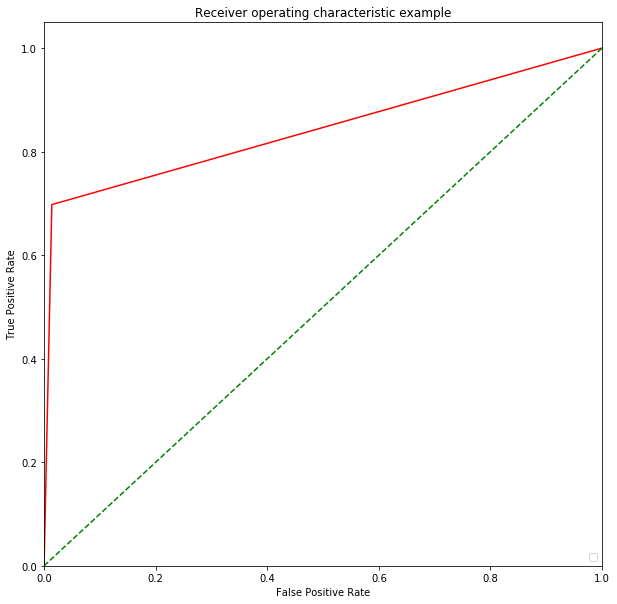

confusion matrix:  [[71  1]
 [13 30]]


In [33]:
plt.figure()
# lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
conf_matrix = confusion_matrix(test_y.astype('int'), y_pre) 
print('confusion matrix: ', conf_matrix)

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit - predict method.

In [34]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters = 2, assign_labels ="discretize",random_state = 0,gamma = 1.0,affinity = 'rbf')

In [35]:
train_X, train_y, test_X, test_y = random30(30)
train_X = normalize(train_X)
train_y = train_y.astype('int')
test_X = normalize(test_X)
test_y = test_y.astype('int')
best_s = 0
small = float('inf')
for i in range(30):
    k = SpectralClustering(n_clusters = 2, assign_labels ="discretize",random_state = 0, gamma = 1.0,affinity = 'rbf')
    y_pred = k.fit_predict(train_X)
    X = y_pred - train_y
    final = np.sum(X**2)
    if final < small:
        small = final
        best_s = k
        y_predict = k.fit_predict(test_X)
        fpr,tpr,threshold = roc_curve(test_y, y_predict)
        roc_auc = auc(fpr,tpr) #AUC
        accuracy = accuracy_score(test_y.astype('int'), y_predict)
        precision = precision_score(test_y, y_predict, average='weighted')
        recall = recall_score(test_y, y_predict, average='weighted')
        f1 = f1_score(test_y, y_predict, average='weighted')

In [36]:
print('roc_auc :',roc_auc)
print('accuracy :',accuracy)
print('precision :',precision)
print('recall :',recall)
print('f1_score :',f1)

roc_auc : 0.8512596899224807
accuracy : 0.8782608695652174
precision : 0.881863354037267
recall : 0.8782608695652174
f1_score : 0.8752214985624597


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

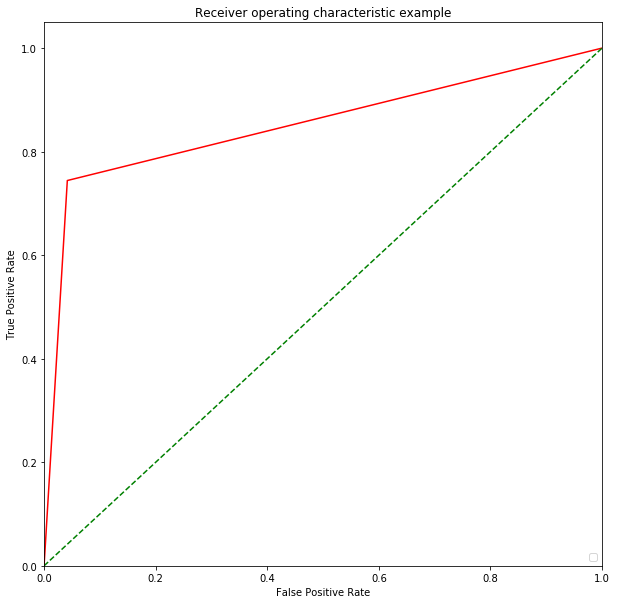

confusion matrix:  [[71  1]
 [13 30]]


In [37]:
plt.figure()
# lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
conf_matrix = confusion_matrix(test_y.astype('int'), y_pre) 
print('confusion matrix: ', conf_matrix)

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Compare with my result, supervised learning do better. I think is probably because although Semi-supervised learning provides a powerful framework for leveraging unlabeled data when labels are limited or expensive to obtain, we argue that these benchmarks fail to address many issues that SSL algorithms would face in real-world applications. The unsupervised learning may underperform when the user must specify the number of clusters, which won't always be easy to do. In addition, if the true underlying clusters in your data are not globular, then K-Means will produce poor clusters.

reference
~~~~~
https://arxiv.org/pdf/1804.09170.pdf
https://elitedatascience.com/machine-learning-algorithms
https://www.guru99.com/supervised-vs-unsupervised-learning.html
https://machinelearningmastery.com/how-to-know-if-your-machine-learning-model-has-good-performance/
https://en.wikipedia.org/wiki/Semi-supervised_learning
https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/
~~~~~

### 2. Active Learning Using Support Vector Machines
##### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [38]:
data_df = pd.read_csv('data_banknote_authentication.txt', header=None)
# temp = shuffle(data_df)
all_data = data_df.iloc[:, 0:4]
label = data_df.iloc[:, 4]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(all_data, label , test_size=0.344, random_state = 42)

In [40]:
x_train

,0,1,2,3
855,-1.878200,-6.58650,4.848600,-0.021566
622,5.042900,-0.52974,0.504390,1.106000
969,-2.178600,-6.44790,6.034400,-0.207770
947,-1.682000,-6.81210,7.139800,1.332300
1199,-2.913800,-9.47110,9.766800,-0.602160
744,4.985200,8.35160,-2.542500,-1.282300
1239,-2.445800,1.62850,-0.885410,-1.480200
503,4.929400,0.27727,0.207920,0.336620
629,3.757000,-5.42360,3.825500,-1.252600
943,-3.127300,-7.11210,11.389700,-0.083634


### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
##### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [41]:
def split_10(x_train, y_train, i , t):
    train_remaining_X_890, train_X_10 = train_test_split(x_train, test_size = 10, random_state = i)
    train_remaining_Y_890, train_y_10 = train_test_split(y_train, test_size = 10, random_state = i)
    if t < 90:
        train_remaining_X, train_X_10_times = train_test_split(x_train, test_size = 10 * t, random_state = i)
        train_remaining_Y, train_y_10_times = train_test_split(y_train, test_size = 10 * t, random_state = i)
    else:
        train_X_10_times = x_train
        train_y_10_times = y_train
    test_error = run_test_error(train_X_10_times, train_y_10_times, train_X_10, train_y_10)
        
    return test_error

def run_test_error(train_X_10_times, train_y_10_times, train_X_10, train_y_10):

    grid = GridSearchCV(LinearSVC(penalty = "l1",dual=False), param_grid={"C":[0.1, 1, 10,100,1000]}, cv=5)
    grid.fit(train_X_10, train_y_10)
    parma = grid.best_params_
    c = parma["C"]

    model = LinearSVC(C = c, penalty = "l1",dual=False)
    model.fit(train_X_10_times, train_y_10_times)
    test_error = 1 - model.score(train_X_10_times, train_y_10_times)
    return test_error

In [42]:
average_test_error = []
for t in range(1, 91):
    test_error_stack = []
    for i in range(50):
        test_error = split_10(x_train, y_train, i, t)
        test_error_stack.append(test_error)
    average_test_error.append(sum(test_error_stack)/50)


In [43]:
# train_X_put = pd.DataFrame()
# train_y_put = pd.DataFrame()
# average_test_error = []
# for i in range(50):
#     test_error_stack = []
#     for i in range(90):
#         train_remaining_X, train_remaining_Y, test_error = split_10(x_train, y_train, i)
#         test_error_stack.append(test_error)
#     average_test_error.append(sum(test_error_stack)/50)

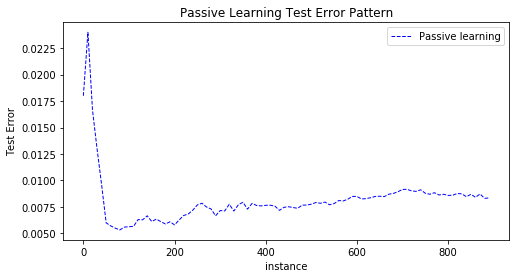

In [44]:
plot_x = []
for i in range(0,900,10):
    plot_x.append(i)
plot_y = average_test_error
plt.figure(figsize=(8,4))
plt.plot(plot_x, plot_y, "b--",linewidth = 1, label='Passive learning')
plt.xlabel("instance")
plt.ylabel("Test Error")
plt.title("Passive Learning Test Error Pattern") 
plt.legend()
plt.show()

##### ii. Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.
##### Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [45]:
def choose_10_for_Active(x_train, y_train, i, t):
    train_remaining_X, train_X_10 = train_test_split(x_train, test_size = 10, random_state = i)
    train_remaining_Y, train_y_10 = train_test_split(y_train, test_size = 10, random_state = i)
    test_error = run_test_error_Active(x_train, y_train, train_X_10, train_y_10, t)
    
    return test_error  #new_train_X, new_train_Y, 

def run_test_error_Active(x_train, y_train, train_X_10, train_y_10, t):

    grid = GridSearchCV(LinearSVC(penalty = "l1",dual=False), param_grid={"C":[0.1, 1, 10,100,1000]}, cv=5)
    grid.fit(train_X_10, train_y_10)
    parma = grid.best_params_
    c = parma["C"]
    
    model = LinearSVC(C = c, penalty = "l1",dual=False)
    model.fit(x_train, y_train)

    distance = model.decision_function(x_train)
    distance1 = abs(distance)
    distance1.sort()
    temp_set = set(distance1[:10 * t])
    top_t = []
    for i in range(len(distance)):
        if abs(distance[i]) in temp_set:
            top_t.append(i)

    test_error = 1 - model.score(x_train.iloc[top_t, :], y_train.iloc[top_t])
    
    return test_error #x_train, y_train, 

In [46]:
average_test_error_active = []
for i in range(50):
    test_error_stack_active = []
    for t in range(1, 91):
        test_error = choose_10_for_Active(x_train, y_train, i, t)
        test_error_stack_active.append(test_error)
    average_test_error_active.append(test_error_stack_active)

In [47]:
Average_test_error_active = []
for i in range(len(average_test_error_active[0])):
    total = 0
    for j in range(len(average_test_error_active)):
        total = total + average_test_error_active[j][i]
    Average_test_error_active.append(total/50)

In [48]:
# def choose_10_for_Active(x_train, y_train, i):
#     train_remaining_X, train_X_10 = train_test_split(x_train, test_size = 10, random_state = i)
#     train_remaining_Y, train_y_10 = train_test_split(y_train, test_size = 10, random_state = i)
#     test_error, new_train_X, new_train_Y = run_test_error_Active(x_train, y_train, train_X_10, train_y_10)
        
#     return new_train_X, new_train_Y, test_error

# def run_test_error_Active(x_train, y_train, train_X_10, train_y_10):

#     grid = GridSearchCV(LinearSVC(penalty = "l1",dual=False), param_grid={"C":[0.1, 1, 10,100,1000]}, cv=5)
#     grid.fit(train_X_10, train_y_10)
#     parma = grid.best_params_
#     c = parma["C"]
    
#     model = LinearSVC(C = c, penalty = "l1",dual=False)
#     model.fit(x_train, y_train)

#     distance = model.decision_function(x_train)
#     distance1 = abs(distance)
#     distance1.sort()
#     temp_set = set(distance1[:10])
#     top_10 = []
#     for i in range(len(distance)):
#         if abs(distance[i]) in temp_set:
#             top_10.append(i)
#     x_train.drop(x_train.index[top_10], axis = 0) 
#     y_train.drop(y_train.index[top_10], axis = 0) 
#     test_error = 1 - model.score(x_train, y_train)
#     return test_error, x_train, y_train

In [49]:
# average_test_error_active = []
# for i in range(50):
#     test_error_stack_active = []
#     for i in range(90):
#         x_train, y_train, test_error = choose_10_for_Active(x_train, y_train, i)
#         test_error_stack_active.append(test_error)
#     average_test_error_active.append(sum(test_error_stack_active)/50)

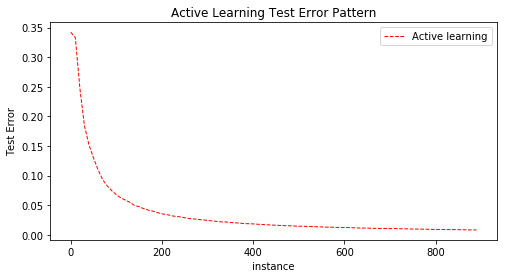

In [50]:
plot_y = Average_test_error_active
plt.figure(figsize=(8,4))
plt.plot(plot_x, plot_y, "r--",linewidth = 1, label='Active learning')
plt.xlabel("instance")
plt.ylabel("Test Error")
plt.title("Active Learning Test Error Pattern") 
plt.legend()
plt.show()

### Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

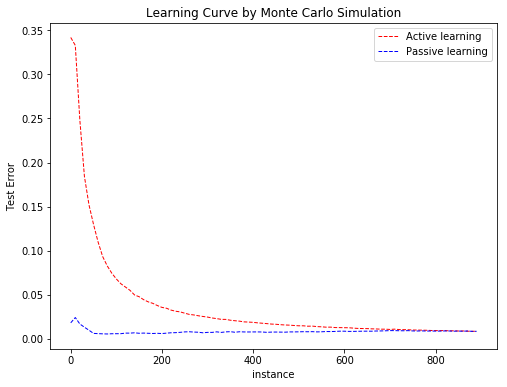

In [51]:
plot_y_active = Average_test_error_active
plot_y = average_test_error
plt.figure(figsize=(8,6))
plt.plot(plot_x, plot_y_active, "r--",linewidth = 1, label='Active learning')
plt.plot(plot_x, plot_y, "b--",linewidth = 1, label='Passive learning')
plt.xlabel("instance")
plt.ylabel("Test Error")
plt.title("Learning Curve by Monte Carlo Simulation") 
plt.legend()
plt.show()

We can find active learning will have higher test error initially, because all active learning scenarios require some sort of informativeness measure of the unlabelled instances. While passive learning used to construct a high performance classifier while keeping the size of the training dataset to a minimum by actively selecting the valuable data points. Thus, it would provide better in this condition at the beginning.